In [37]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 99)
pd.set_option('display.max_rows', 200)

In [2]:
movies = pd.read_csv('./datasets/movies.csv')
links = pd.read_csv('./datasets/links.csv')
ratings = pd.read_csv('./datasets/ratings.csv')
tags = pd.read_csv('./datasets/tags.csv')

### Movies and Links

In [3]:
df = pd.merge(movies, links)
df.columns = df.columns.str.lower()
df.rename(columns={'movieid':'movie_id', 'imdbid':'imdb_id', 'tmdbid':'tmdb_id'}, inplace=True)

In [4]:
df.head()

,movie_id,title,genres,imdb_id,tmdb_id
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0


In [5]:
# dataframe with all movies whose title has an extra space at the end
spaces = df.loc[df['title'].str[-1] == ' ']

# getting rid of that extra space
for i in spaces['title']:
    df.replace(to_replace = {'title': i},
                value = i[:-1],
                inplace = True)

# fixing an individual row that was formatted differently
df.replace(to_replace = {'title':'Death Note: Desu nôto (2006–2007)'},
           value = 'Death Note: Desu nôto (2006)',
           inplace = True)

In [6]:
# creating a new column for release year
release_years = []
for i in df['title']:
    release_years.append(i[-5:-1])
df['release_year'] = release_years

# getting rid of the year from the title column for
# the majority of movies which have it listed there

majority = df.loc[df['title'].str[-1] == ')']
anomalies = df.loc[df['title'].str[-1] != ')']

for i in majority['title']:
    df.replace(to_replace = {'title': i},
                value = i[:-7],
                inplace = True)

# fixing another individual row that is formatted differently
df.replace(to_replace = {'title':'Angst '},
           value = 'Angst',
           inplace = True)

In [7]:
# taking care of the anomalies manually.
# I looked up the release years on IMDB, because figuring out how to code a web scrape on imdb
# would have taken me more time than Dr. Strange has access to.

df['release_year'][6059] = 1993
df['release_year'][9031] = 2018
df['release_year'][9091] = 2015
df['release_year'][9138] = 1980
df['release_year'][9179] = 2016
df['release_year'][9259] = 2016
df['release_year'][9367] = 2016
df['release_year'][9448] = 2016
df['release_year'][9514] = 1980
df['release_year'][9515] = 2017
df['release_year'][9525] = 2017
df['release_year'][9611] = 2011

# changing release_year column to numerical type
df['release_year'] = df['release_year'].astype(int)

df.dtypes;

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCo

In [8]:
# dropping null values
# df.isnull().sum()
# df['tmdb_id'].loc[df['tmdb_id'].isnull()==True]
df.dropna(inplace=True)

In [9]:
df.head()

,movie_id,title,genres,imdb_id,tmdb_id,release_year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1995
1,2,Jumanji,Adventure|Children|Fantasy,113497,8844.0,1995
2,3,Grumpier Old Men,Comedy|Romance,113228,15602.0,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,114885,31357.0,1995
4,5,Father of the Bride Part II,Comedy,113041,11862.0,1995


### Ratings

In [10]:
# lowercase, renaming, and dropping timestamp column

ratings.columns = ratings.columns.str.lower()
ratings.rename(columns={'movieid':'movie_id', 'userid':'user_id'}, inplace=True)
ratings.drop(columns = ['timestamp'], inplace=True)

In [39]:
ratings.head(200)

,user_id,movie_id,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
5,1,70,3.0
6,1,101,5.0
7,1,110,4.0
8,1,151,5.0
9,1,157,5.0


In [12]:
# new columns for mean, max, min, median, and number of ratings for each movie

avg_ratings = []
for i in df['movie_id']:
    avg_rating = ratings.loc[ratings['movie_id']==i]['rating'].mean()
    avg_ratings.append(avg_rating)
df['avg_rating'] = avg_ratings

max_ratings = []
for i in df['movie_id']:
    max_rating = ratings.loc[ratings['movie_id']==i]['rating'].max()
    max_ratings.append(max_rating)
df['max_rating'] = max_ratings

min_ratings = []
for i in df['movie_id']:
    min_rating = ratings.loc[ratings['movie_id']==i]['rating'].min()
    min_ratings.append(min_rating)
df['min_rating'] = min_ratings

med_ratings = []
for i in df['movie_id']:
    med_rating = ratings.loc[ratings['movie_id']==i]['rating'].median()
    med_ratings.append(med_rating)
df['med_rating'] = med_ratings

numb_ratings = []
for i in df['movie_id']:
    numb_rating = ratings.loc[ratings['movie_id']==i]['rating'].count()
    numb_ratings.append(numb_rating)
df['numb_rating'] = numb_ratings

In [40]:
df['release_year'].max()

2018

In [41]:
df['release_year'].min()

1902

In [13]:
df.head()

,movie_id,title,genres,imdb_id,tmdb_id,release_year,avg_rating,max_rating,min_rating,med_rating,numb_rating
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1995,3.920930,5.0,0.5,4.0,215
1,2,Jumanji,Adventure|Children|Fantasy,113497,8844.0,1995,3.431818,5.0,0.5,3.5,110
2,3,Grumpier Old Men,Comedy|Romance,113228,15602.0,1995,3.259615,5.0,0.5,3.0,52
3,4,Waiting to Exhale,Comedy|Drama|Romance,114885,31357.0,1995,2.357143,3.0,1.0,3.0,7
4,5,Father of the Bride Part II,Comedy,113041,11862.0,1995,3.071429,5.0,0.5,3.0,49


# TO DO next:
look for correlations between:
    -reviewer and avg_rating (are they biased towareds good/bad films? This would help with the recommender system)
    -reviewer and release_year
    -reviewer and genre

In [36]:
ratings.head(20)

,user_id,movie_id,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
5,1,70,3.0
6,1,101,5.0
7,1,110,4.0
8,1,151,5.0
9,1,157,5.0


In [16]:
ratings.corrwith(df['avg_rating'])

user_id     0.019002
movie_id    0.010212
rating      0.002086
dtype: float64

In [17]:
ratings.corrwith(df['release_year'])

user_id     0.461400
movie_id    0.002740
rating      0.077906
dtype: float64

In [18]:
df['genres'].value_counts(normalize = True)

Drama                                             0.108075
Comedy                                            0.097082
Comedy|Drama                                      0.044689
Comedy|Romance                                    0.037292
Drama|Romance                                     0.035854
                                                    ...   
Adventure|Drama|Horror|Mystery|Thriller           0.000103
Action|Children|Drama                             0.000103
Adventure|Comedy|Sci-Fi|Western                   0.000103
Action|Fantasy|Horror|Mystery|Thriller            0.000103
Action|Adventure|Comedy|Crime|Mystery|Thriller    0.000103
Name: genres, Length: 951, dtype: float64

In [26]:
df[df['genres'].str.contains('Comedy')]['genres'].value_counts()

Comedy                                      945
Comedy|Drama                                435
Comedy|Romance                              363
Comedy|Drama|Romance                        276
Comedy|Crime                                101
                                           ... 
Comedy|Crime|Romance|Thriller                 1
Comedy|Drama|Romance|Western                  1
Animation|Children|Comedy|Musical|Sci-Fi      1
Comedy|Sci-Fi|War                             1
Comedy|Horror|Musical|Sci-Fi                  1
Name: genres, Length: 341, dtype: int64

AttributeError: 'QuadMesh' object has no property 'seamap'

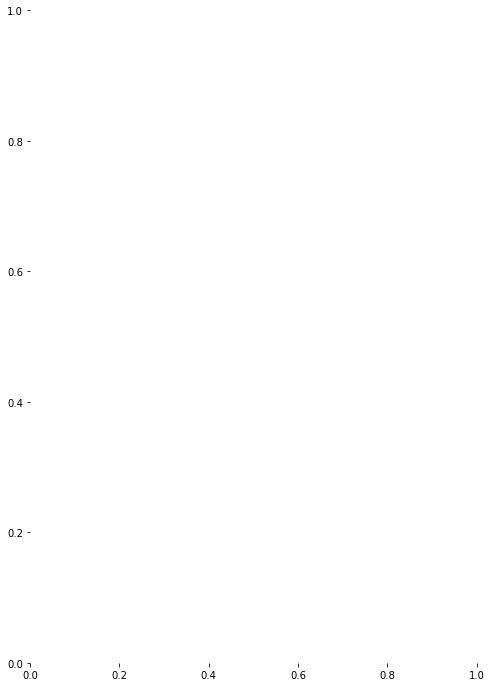

In [35]:
plt.figure(figsize = (8,12))
sns.heatmap(df.corr()[['avg_rating']].sort_values('avg_rating'),
                                                   annot = True,
                                                   seamap = 'coolwarm',
                                                   vmin = -1,
           vmax = 1)

In [22]:
genre_dummies = pd.get_dummies(df['genres'])

In [23]:
genre_dummies

,(no genres listed),Action,Action|Adventure,Action|Adventure|Animation,Action|Adventure|Animation|Children,Action|Adventure|Animation|Children|Comedy,Action|Adventure|Animation|Children|Comedy|Fantasy,Action|Adventure|Animation|Children|Comedy|IMAX,Action|Adventure|Animation|Children|Comedy|Romance,Action|Adventure|Animation|Children|Comedy|Sci-Fi,Action|Adventure|Animation|Children|Comedy|Sci-Fi|IMAX,Action|Adventure|Animation|Children|Comedy|Western,Action|Adventure|Animation|Children|Fantasy,Action|Adventure|Animation|Children|Fantasy|Sci-Fi,Action|Adventure|Animation|Children|Sci-Fi,Action|Adventure|Animation|Comedy,Action|Adventure|Animation|Comedy|Crime|Mystery,Action|Adventure|Animation|Comedy|Fantasy|Mystery|Sci-Fi,Action|Adventure|Animation|Comedy|Fantasy|Sci-Fi,Action|Adventure|Animation|Comedy|Sci-Fi,Action|Adventure|Animation|Comedy|Thriller,Action|Adventure|Animation|Crime|Fantasy,Action|Adventure|Animation|Drama,Action|Adventure|Animation|Drama|Fantasy,Action|Adventure|Animation|Drama|Fantasy|Sci-Fi,Action|Adventure|Animation|Fantasy,Action|Adventure|Animation|Fantasy|IMAX,Action|Adventure|Animation|Fantasy|Sci-Fi,Action|Adventure|Animation|Horror,Action|Adventure|Animation|Horror|Sci-Fi,Action|Adventure|Animation|Sci-Fi,Action|Adventure|Animation|Sci-Fi|Thriller,Action|Adventure|Children,Action|Adventure|Children|Comedy,Action|Adventure|Children|Comedy|Crime,Action|Adventure|Children|Comedy|Fantasy,Action|Adventure|Children|Comedy|Fantasy|Sci-Fi,Action|Adventure|Children|Comedy|Mystery,Action|Adventure|Children|Comedy|Sci-Fi,Action|Adventure|Children|Crime|Mystery|Thriller,Action|Adventure|Children|Drama,Action|Adventure|Children|Fantasy,Action|Adventure|Children|Fantasy|Mystery|Thriller,Action|Adventure|Children|IMAX,Action|Adventure|Children|Mystery|Sci-Fi,Action|Adventure|Children|Sci-Fi,Action|Adventure|Comedy,Action|Adventure|Comedy|Crime,Action|Adventure|Comedy|Crime|Drama,...,Fantasy|Sci-Fi,Fantasy|Western,Film-Noir,Film-Noir|Horror|Mystery|Thriller,Film-Noir|Mystery,Film-Noir|Mystery|Thriller,Film-Noir|Romance|Thriller,Film-Noir|Thriller,Horror,Horror|IMAX,Horror|Mystery,Horror|Mystery|Sci-Fi,Horror|Mystery|Sci-Fi|Thriller,Horror|Mystery|Thriller,Horror|Romance,Horror|Romance|Sci-Fi,Horror|Romance|Thriller,Horror|Sci-Fi,Horror|Sci-Fi|Thriller,Horror|Sci-Fi|Western,Horror|Thriller,Horror|Thriller|IMAX,Horror|Thriller|Western,Horror|Western,Musical,Musical|Romance,Musical|Romance|War,Musical|Romance|Western,Musical|Western,Mystery,Mystery|Romance|Sci-Fi|Thriller,Mystery|Romance|Thriller,Mystery|Sci-Fi,Mystery|Sci-Fi|Thriller,Mystery|Sci-Fi|Thriller|IMAX,Mystery|Thriller,Romance,Romance|Sci-Fi,Romance|Sci-Fi|Thriller,Romance|Thriller,Romance|War,Romance|Western,Sci-Fi,Sci-Fi|IMAX,Sci-Fi|Thriller,Sci-Fi|Thriller|IMAX,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [24]:
genre_dummies.loc[genre_dummies['Film-Noir'] == 1]

,(no genres listed),Action,Action|Adventure,Action|Adventure|Animation,Action|Adventure|Animation|Children,Action|Adventure|Animation|Children|Comedy,Action|Adventure|Animation|Children|Comedy|Fantasy,Action|Adventure|Animation|Children|Comedy|IMAX,Action|Adventure|Animation|Children|Comedy|Romance,Action|Adventure|Animation|Children|Comedy|Sci-Fi,Action|Adventure|Animation|Children|Comedy|Sci-Fi|IMAX,Action|Adventure|Animation|Children|Comedy|Western,Action|Adventure|Animation|Children|Fantasy,Action|Adventure|Animation|Children|Fantasy|Sci-Fi,Action|Adventure|Animation|Children|Sci-Fi,Action|Adventure|Animation|Comedy,Action|Adventure|Animation|Comedy|Crime|Mystery,Action|Adventure|Animation|Comedy|Fantasy|Mystery|Sci-Fi,Action|Adventure|Animation|Comedy|Fantasy|Sci-Fi,Action|Adventure|Animation|Comedy|Sci-Fi,Action|Adventure|Animation|Comedy|Thriller,Action|Adventure|Animation|Crime|Fantasy,Action|Adventure|Animation|Drama,Action|Adventure|Animation|Drama|Fantasy,Action|Adventure|Animation|Drama|Fantasy|Sci-Fi,Action|Adventure|Animation|Fantasy,Action|Adventure|Animation|Fantasy|IMAX,Action|Adventure|Animation|Fantasy|Sci-Fi,Action|Adventure|Animation|Horror,Action|Adventure|Animation|Horror|Sci-Fi,Action|Adventure|Animation|Sci-Fi,Action|Adventure|Animation|Sci-Fi|Thriller,Action|Adventure|Children,Action|Adventure|Children|Comedy,Action|Adventure|Children|Comedy|Crime,Action|Adventure|Children|Comedy|Fantasy,Action|Adventure|Children|Comedy|Fantasy|Sci-Fi,Action|Adventure|Children|Comedy|Mystery,Action|Adventure|Children|Comedy|Sci-Fi,Action|Adventure|Children|Crime|Mystery|Thriller,Action|Adventure|Children|Drama,Action|Adventure|Children|Fantasy,Action|Adventure|Children|Fantasy|Mystery|Thriller,Action|Adventure|Children|IMAX,Action|Adventure|Children|Mystery|Sci-Fi,Action|Adventure|Children|Sci-Fi,Action|Adventure|Comedy,Action|Adventure|Comedy|Crime,Action|Adventure|Comedy|Crime|Drama,...,Fantasy|Sci-Fi,Fantasy|Western,Film-Noir,Film-Noir|Horror|Mystery|Thriller,Film-Noir|Mystery,Film-Noir|Mystery|Thriller,Film-Noir|Romance|Thriller,Film-Noir|Thriller,Horror,Horror|IMAX,Horror|Mystery,Horror|Mystery|Sci-Fi,Horror|Mystery|Sci-Fi|Thriller,Horror|Mystery|Thriller,Horror|Romance,Horror|Romance|Sci-Fi,Horror|Romance|Thriller,Horror|Sci-Fi,Horror|Sci-Fi|Thriller,Horror|Sci-Fi|Western,Horror|Thriller,Horror|Thriller|IMAX,Horror|Thriller|Western,Horror|Western,Musical,Musical|Romance,Musical|Romance|War,Musical|Romance|Western,Musical|Western,Mystery,Mystery|Romance|Sci-Fi|Thriller,Mystery|Romance|Thriller,Mystery|Sci-Fi,Mystery|Sci-Fi|Thriller,Mystery|Sci-Fi|Thriller|IMAX,Mystery|Thriller,Romance,Romance|Sci-Fi,Romance|Sci-Fi|Thriller,Romance|Thriller,Romance|War,Romance|Western,Sci-Fi,Sci-Fi|IMAX,Sci-Fi|Thriller,Sci-Fi|Thriller|IMAX,Thriller,War,Western
1531,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3269,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4896,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df